Vamos a realizar el primer modelo para la VR casual. Estandarizado. Con variables predictoras principales (6)

In [1]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import pickle

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

In [2]:
df = pd.read_pickle("datos/casual_cod_est.pkl")
df.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,hum,windspeed,casual
0,2018-01-01,0.306137,0.856346,0.17643,1.724547,2.000000,1.025802,0.746165,-0.486274,0.855582,-0.208909,331
1,2018-01-02,0.306137,0.856346,0.17643,0.992329,1.369596,0.992329,0.746165,-0.425690,0.332722,0.687550,131
2,2018-01-03,0.306137,0.856346,0.17643,0.992329,0.929568,0.992329,1.156206,-0.949970,-0.900337,0.685210,120
3,2018-01-04,0.306137,0.856346,0.17643,0.992329,0.876569,0.992329,1.156206,-0.938563,-0.170632,-0.210435,108
4,2018-01-05,0.306137,0.856346,0.17643,0.992329,0.749651,0.992329,1.156206,-0.853992,-0.901843,0.060294,82


In [3]:
df.shape

(730, 12)

In [4]:

X1 = df.drop(["casual", "date", "month", "weather", "season", "holiday"], axis = 1)
y1 = df["casual"]
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 42)


In [5]:
arbol = DecisionTreeRegressor(random_state =0)
arbol.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [6]:
# fig = plt.figure(figsize = (10,6))
# tree.plot_tree(arbol, feature_names = x_train.columns, filled = True)
# plt.show()

In [7]:
max_features = np.sqrt(len(x_train.columns))
max_features

2.449489742783178

In [8]:
print(arbol.tree_.max_depth)

17


In [9]:
y_pred_test_dt = arbol.predict(x_test)
y_pred_train_dt = arbol.predict(x_train)

In [10]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
                'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
                'R2':  [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [11]:

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,250.294521,138773.390411,372.523007,0.711144,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I


In [12]:
param = {"max_depth": [2,4,6,8,10], 
        "max_features": [1,2,3,4],  
        "min_samples_split": [10,50,100],
        "min_samples_leaf": [10,50,100],
        'random_state': [16]} 

In [13]:

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(), # tipo de modelo que queremos hacer
            param_grid= param, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error")

In [14]:
gs.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100],
                         'random_state': [16]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [15]:
mejor_modelo = gs.best_estimator_
mejor_modelo

DecisionTreeRegressor(max_depth=8, max_features=4, min_samples_leaf=10,
                      min_samples_split=10, random_state=16)

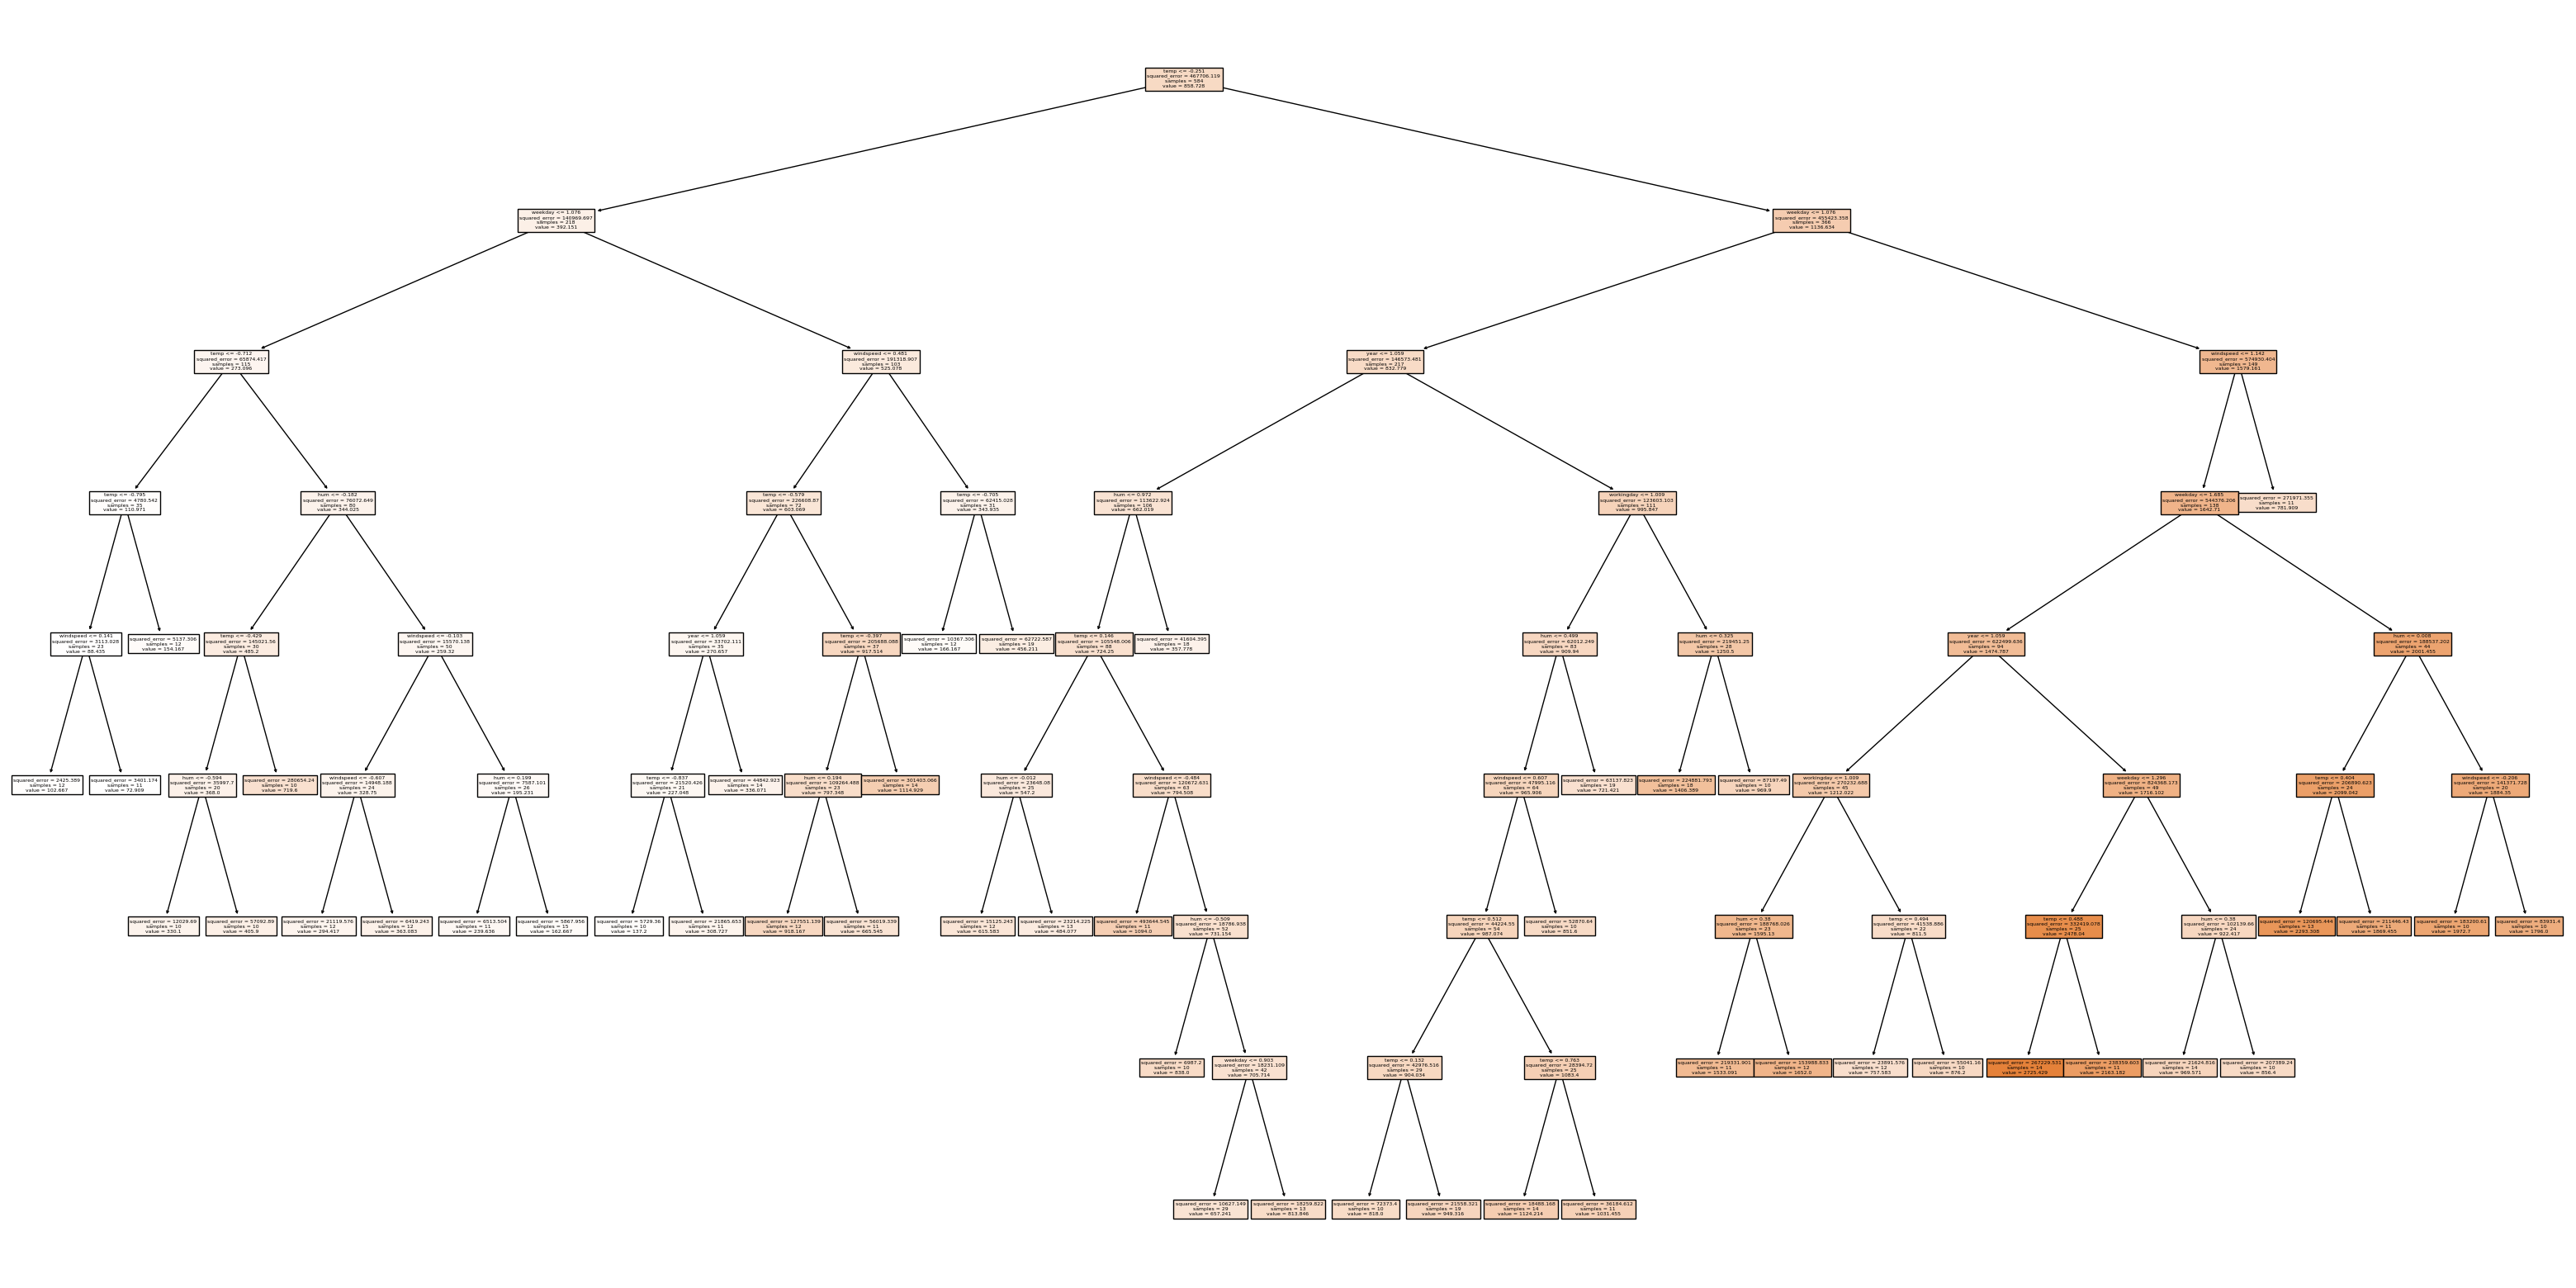

In [16]:
fig = plt.figure(figsize=(40, 20))
tree.plot_tree(mejor_modelo, feature_names=x_train.columns, filled=True);

In [17]:
y_pred_test_dt2 = mejor_modelo.predict(x_test)
y_pred_train_dt2 = mejor_modelo.predict(x_train)

In [18]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,237.418203,127693.618287,357.342438,0.734206,test,Decision tree II
1,198.324066,88759.856489,297.925924,0.810223,train,Decision tree II


In [19]:

df_decision_results = pd.concat([dt_results1, dt_results2], axis = 0)
df_decision_results

,MAE,MSE,RMSE,R2,set,modelo
0,250.294521,138773.390411,372.523007,0.711144,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I
0,237.418203,127693.618287,357.342438,0.734206,test,Decision tree II
1,198.324066,88759.856489,297.925924,0.810223,train,Decision tree II


In [20]:

param_prueba2 = {"max_depth": [6,8,10], 
        "max_features": [1,2,3,4],  
        "min_samples_split": [5,10,15],
        "min_samples_leaf": [5,10,15],
        'random_state': [56]} 

In [21]:
gs2 = GridSearchCV(
            estimator=DecisionTreeRegressor(), # tipo de modelo que queremos hacer
            param_grid= param_prueba2, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error")

In [22]:
gs2.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 8, 10], 'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15],
                         'random_state': [56]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [23]:
mejor_modelo2 = gs2.best_estimator_
mejor_modelo2

DecisionTreeRegressor(max_depth=10, max_features=4, min_samples_leaf=5,
                      min_samples_split=15, random_state=56)

In [24]:
y_pred_test_dt3 = mejor_modelo2.predict(x_test)
y_pred_train_dt3 = mejor_modelo2.predict(x_train)

In [25]:
dt_results3 = metricas(y_test, y_train, y_pred_test_dt3, y_pred_train_dt3, "Decision tree III")
dt_results3

,MAE,MSE,RMSE,R2,set,modelo
0,228.910669,121276.165802,348.247277,0.747564,test,Decision tree III
1,176.220767,79368.325073,281.723845,0.830303,train,Decision tree III


In [26]:
df_decision_results3 = pd.concat([df_decision_results, dt_results3], axis = 0)
df_decision_results3

,MAE,MSE,RMSE,R2,set,modelo
0,250.294521,138773.390411,372.523007,0.711144,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I
0,237.418203,127693.618287,357.342438,0.734206,test,Decision tree II
1,198.324066,88759.856489,297.925924,0.810223,train,Decision tree II
0,228.910669,121276.165802,348.247277,0.747564,test,Decision tree III
1,176.220767,79368.325073,281.723845,0.830303,train,Decision tree III


In [27]:
# vamos a crearnos un dataframe 
importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': mejor_modelo.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,temp,0.415121
1,weekday,0.410428
0,year,0.054688
5,windspeed,0.048650
2,workingday,0.042174
4,hum,0.028940


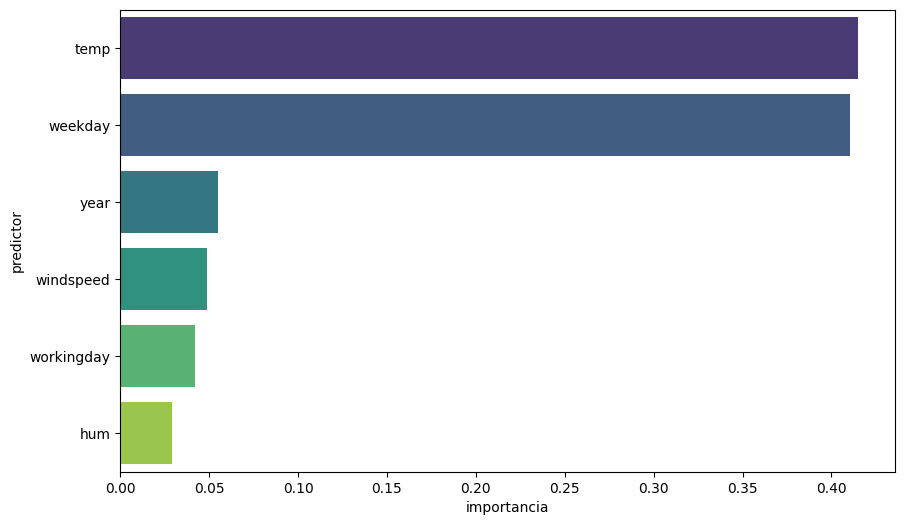

In [28]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6)) 
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");
plt.show()

In [29]:
#parámetros para el random forest
param_rf = {"max_depth": [2,4,6,8,10], 
        "max_features": [1,2,3,4],  
        "min_samples_split": [10,50,100],
        "min_samples_leaf": [10,50,100],
        'random_state': [65]} 

In [30]:
gs_rf = GridSearchCV(
            estimator=RandomForestRegressor(), # tipo de modelo que queremos hacer
            param_grid= param_rf, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") 

In [31]:
gs_rf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [10, 50, 100],
                         'min_samples_split': [10, 50, 100],
                         'random_state': [65]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [32]:

bosque = gs_rf.best_estimator_
bosque

RandomForestRegressor(max_depth=8, max_features=4, min_samples_leaf=10,
                      min_samples_split=10, random_state=65)

In [33]:
y_pred_test_rf = bosque.predict(x_test)
y_pred_train_rf = bosque.predict(x_train)

In [34]:
dt_results_rf = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest") 
dt_results_rf

,MAE,MSE,RMSE,R2,set,modelo
0,233.795137,110515.311743,332.438433,0.769963,test,Random Forest
1,212.284266,102379.035195,319.967241,0.781104,train,Random Forest


In [35]:
# vamos a crearnos un dataframe 
importancia_predictores_rf1 = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores_rf1.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_rf1

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,temp,0.482604
1,weekday,0.320062
4,hum,0.063466
0,year,0.062663
2,workingday,0.041587
5,windspeed,0.029618


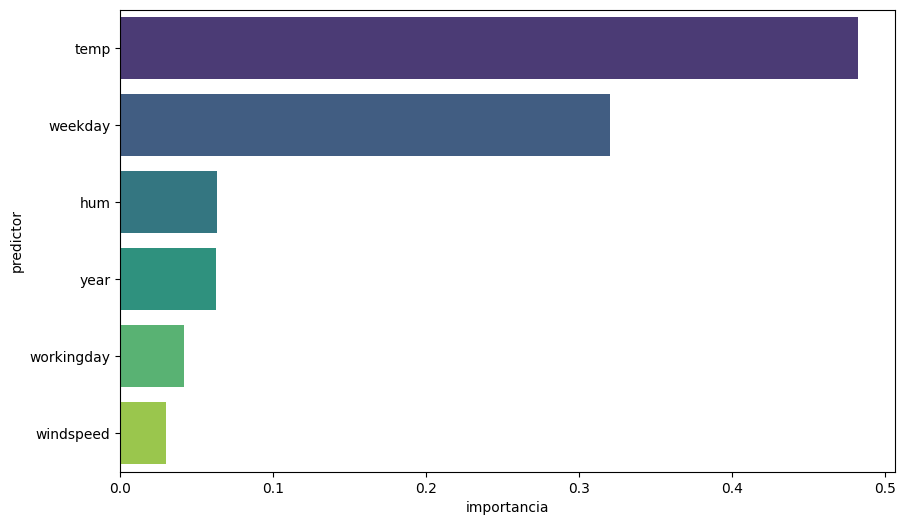

In [36]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6)) 
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores_rf1, palette="viridis");
plt.show()

RF2

In [37]:
#parámetros para el random forest
param_rf2 = {"max_depth": [6,8,9,10], 
        "max_features": [1,2,3,4],  
        "min_samples_split": [7,10,15],
        "min_samples_leaf": [7,10,15],
        'random_state': [65]} 

In [38]:
gs_rf2 = GridSearchCV(
            estimator=RandomForestRegressor(), # tipo de modelo que queremos hacer
            param_grid= param_rf2, # que hiperparámetros queremos que testee
            cv=10, # crossvalidation que aprendimos en la lección de regresión lineal intro. 
            verbose=-1, # para que no nos printee ningún mensaje en pantalla
            return_train_score = True, # para que nos devuelva el valor de las métricas de set de datos de entrenamiento
            scoring="neg_mean_squared_error") 

In [39]:
gs_rf2.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 8, 9, 10],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [7, 10, 15],
                         'min_samples_split': [7, 10, 15],
                         'random_state': [65]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=-1)

In [40]:
with open ("datos/mejor_modelo_casual.pkl", "wb") as f:
    pickle.dump(gs_rf2, f)

In [41]:
bosque2 = gs_rf2.best_estimator_
bosque2

RandomForestRegressor(max_depth=9, max_features=4, min_samples_leaf=7,
                      min_samples_split=7, random_state=65)

In [42]:
y_pred_test_rf2 = bosque2.predict(x_test)
y_pred_train_rf2 = bosque2.predict(x_train)

In [43]:
dt_results_rf2 = metricas(y_test, y_train, y_pred_test_rf2, y_pred_train_rf2, "Random Forest") 
dt_results_rf2

,MAE,MSE,RMSE,R2,set,modelo
0,221.556526,103792.060450,322.167752,0.783957,test,Random Forest
1,193.272399,85590.728241,292.558931,0.816999,train,Random Forest


In [44]:
# vamos a crearnos un dataframe 
importancia_predictores_rf2 = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': bosque2.feature_importances_}
                            )


# ordenamos de mayor a menor los resultados
importancia_predictores_rf2.sort_values(by=["importancia"], ascending=False, inplace = True)

# printeamos los resultados
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_rf2

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,temp,0.460864
1,weekday,0.311907
0,year,0.070430
4,hum,0.070341
2,workingday,0.043333
5,windspeed,0.043125


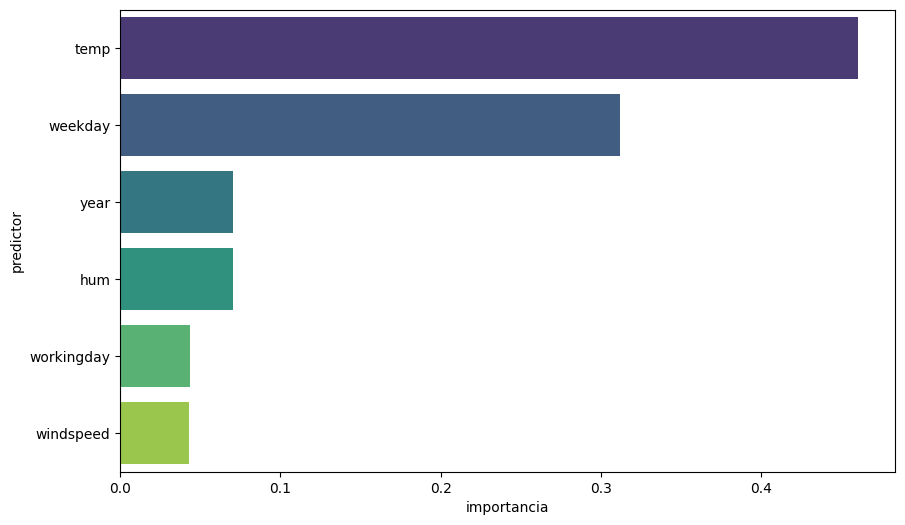

In [45]:
# por último ploteamos los resultados para verlo de una forma más amigable. 

plt.figure(figsize=(10,6)) 
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores_rf2, palette="viridis");
plt.show()